# CEO-Request Challenge

## 1. Problem statement (summarized)

>❓ How should Olist improve its profit margin ❓, given that it has 
> - some revenues per sellers per months
> - some revenues per orders
> - some reputation costs (estimated) per bad reviews
> - some operational costs of IT system that grows with number of orders, but not linearly (scale effects)


Let's recap our key findings so far :
- We have seen that `wait_time` was the most significant factor behind low review scores, but reading comments of the bad reviews also showed that some of them were linked to the seller or to the product itself.
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`. The latter being outside of Olist's direct control, improving it is not a quick-win recommendation we can make to Olist CEO without in-depth analysis of their operational practices.
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.

👉 We recommend you to start with the the seller analysis 1.1) below, but feel free to investigate into other hypothesis instead 1.2)

### 1.1 (recommended) **Should Olist remove underperforming sellers from its marketplace ?** 🕵🏻

To analyse the impact of removing the worse sellers from Olist's marketplace, we will perform a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? (granted, it's hard to know in advance who is a good seller, but let's start with this and iterate later).

1️⃣ Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)
- the number of `orders` (it will impact the overall IT costs)


2️⃣ We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

👉 Write down a detailed strategy (step by step) to create the DataFrame you need for the first step.

<br>

<details>
    <summary> <i>💡 Think about how to re-use or update the logic you've already coded in your 🗂 `olist` package</i> </summary>


Starting from your current `seller().get_training_data()` DataFrame, can you easily transform it to compute:
- Olist's positive `revenue_per_seller`? 
- Olist's `cost_of_bad_reviews`?

You will orally present your insights to your favorite TA at the end of this unit `Communicate` "
</details>


### 1.2 (optional): Here are other hypothesis you may want to investigate instead

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after it has a honeymoon period of few months?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...


## Your turn!

🧺 Keep this notebook tidy! 

📅 🗣 📊 You will orally present your insights to your favorite TA at the end of this unit `Communicate`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from olist.data import Olist
from olist.order import Order
from olist.seller import Seller
from olist.product import Product
import statsmodels.formula.api as smf
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

In [2]:
seller = Seller()
sellers = seller.get_training_data()
order = Order()
orders = order.get_training_data()
product = Product()
products = product.get_training_data()

In [3]:
final_sellers = sellers[['seller_id', 'wait_time', 'quantity','revenues', 'cost_of_reviews' ,'profits']]
perdidas = pd.DataFrame(final_sellers.profits[final_sellers.profits.map(lambda i: i < 0)])
idea1 = perdidas.merge(sellers[['quantity']], how='inner', right_index=True, left_index=True).sort_values('profits',ascending=True)
idea1['perdida_proporcional'] = (idea1.profits / idea1.quantity)

In [4]:
perdida_ordenada = idea1.sort_values('perdida_proporcional', ascending=True)
perdida_ordenada

,profits,quantity,perdida_proporcional
1875,-120.100,1,-120.100000
2014,-99.310,1,-99.310000
260,-98.810,1,-98.810000
153,-98.750,1,-98.750000
2135,-98.700,1,-98.700000
...,...,...,...
2247,-1.500,12,-0.125000
1285,-0.200,2,-0.100000
833,-8.330,113,-0.073717
2951,-0.050,5,-0.010000


In [122]:
sellers.profits.sum()

1167608.4440000001

In [5]:
idea1_test = perdida_ordenada[perdida_ordenada.perdida_proporcional.map(lambda i : i > -50)]
idea1_test

,profits,quantity,perdida_proporcional
1824,-48.910,1,-48.910000
2361,-95.700,2,-47.850000
513,-95.680,2,-47.840000
2315,-47.750,1,-47.750000
773,-94.620,2,-47.310000
...,...,...,...
2247,-1.500,12,-0.125000
1285,-0.200,2,-0.100000
833,-8.330,113,-0.073717
2951,-0.050,5,-0.010000


In [13]:
idea1_test.profits.sum()

-301778.662

In [14]:
idea1_test.quantity.sum() 

45022

In [23]:
threshold = np.linspace(0,-130, 13)
threshold

array([   0.        ,  -10.83333333,  -21.66666667,  -32.5       ,
        -43.33333333,  -54.16666667,  -65.        ,  -75.83333333,
        -86.66666667,  -97.5       , -108.33333333, -119.16666667,
       -130.        ])

In [6]:
profits = []
quantity = []
for t in np.linspace(0,-130, 13):
    idea1_test = perdida_ordenada[perdida_ordenada.perdida_proporcional.map(lambda i : i > t)]
    profits.append(idea1_test.profits.sum())
    quantity.append(idea1_test.quantity.sum()) 
print(quantity)
print(profits)

[0, 38055, 44356, 44752, 44972, 45028, 45037, 45044, 45056, 45076, 45080, 45080, 45081]
[0.0, -195875.85799999998, -281316.182, -291190.816, -299492.142, -302098.402, -302640.262, -303110.902, -304094.88599999994, -305946.94899999996, -306342.519, -306342.519, -306462.61899999995]


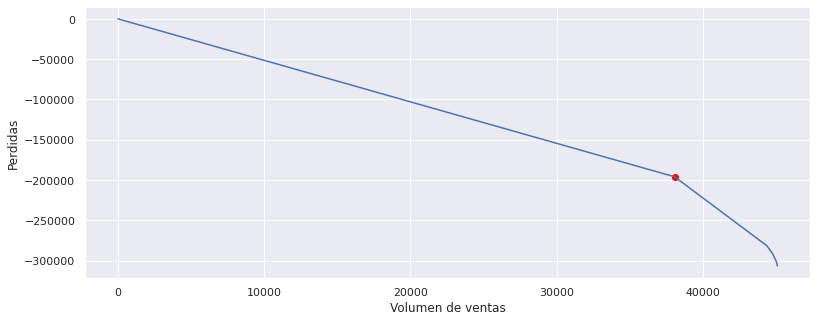

In [73]:
plt.figure(figsize=(13,5))

plt.plot(quantity, profits);
plt.scatter([38055], [-195875], c='red')
plt.ylabel('Perdidas')
plt.xlabel('Volumen de ventas')

delta_quantity = ((45081 - 38055) / sellers.quantity.sum())*100
delta_profits = ((-306462.61899999995 - -195875.85799999998 ) /sellers.profits.sum()) *100


### Reduccion del volumen de ventas = 6.24%
### Reduccion de perdidas = 9.47%

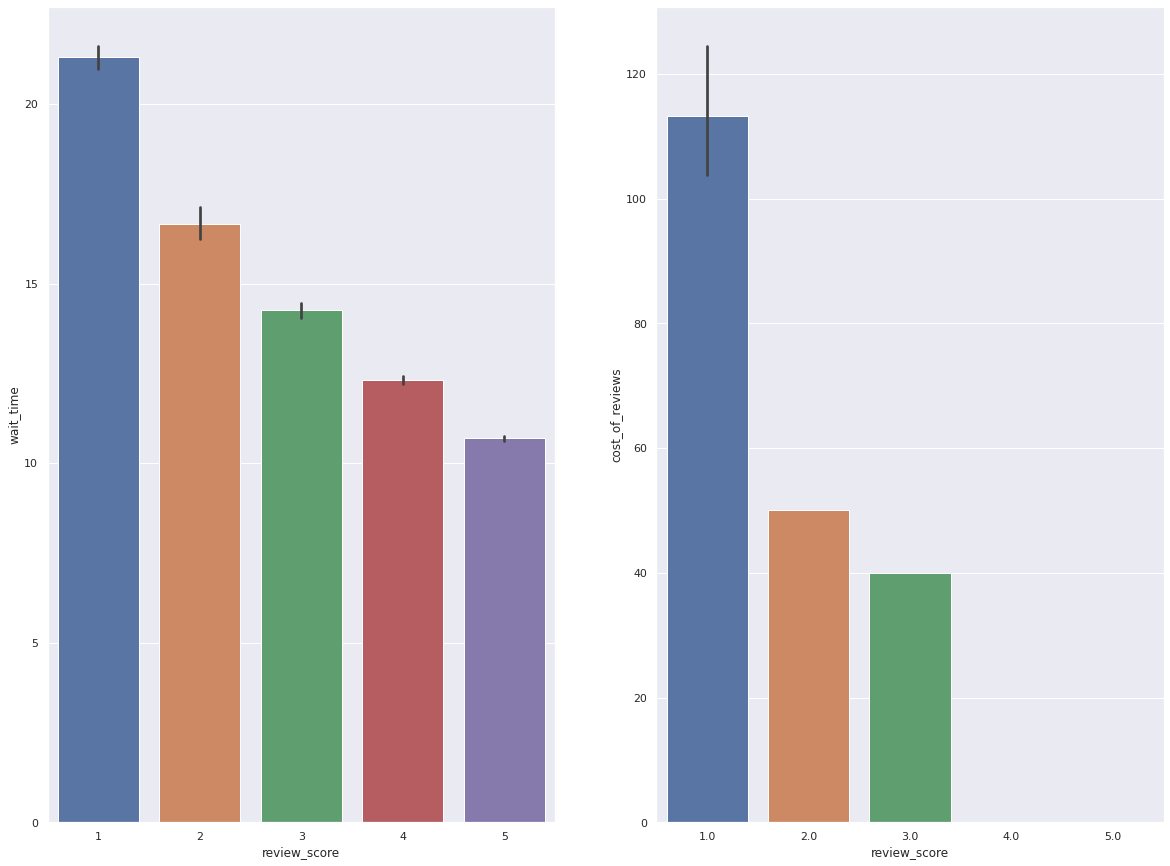

In [75]:
fig, axes = plt.subplots(1, 2)
sns.set(rc={'figure.figsize':(10,15)})

sns.barplot( x=orders.review_score, y=orders.wait_time, ax=axes[0]);
sns.barplot( x= test2.review_score, y=test2.cost_of_reviews, ax=axes[1]);